In [80]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from pprint import pprint
import PIL
import matplotlib.pyplot as plt

In [41]:
df = pd.DataFrame({'category' : ['VAO', 'CAO', 'SAO']})

In [11]:
df.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>category</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>VAO</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>CAO</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>SAO</td>\n    </tr>\n  </tbody>\n</table>'

In [17]:
le = LabelEncoder()
le.fit(df['category'])
encoded_distrcit = le.transform(df['category'])
df = df.assign(encoded=encoded_distrcit)

In [20]:
df.to_markdown()

'|    | category   |   encoded |\n|---:|:-----------|----------:|\n|  0 | VAO        |         2 |\n|  1 | CAO        |         0 |\n|  2 | SAO        |         1 |'

In [26]:
del df['encoded']

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
df['category'].tolist()

['VAO', 'CAO', 'SAO']

In [46]:
df

,category
0,VAO
1,CAO
2,SAO


In [53]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(df)

In [53]:
pprint(pd.concat([df, pd.DataFrame(ohe.fit_transform(df), columns=ohe.categories_)], axis=1).to_markdown())

("|    | category   |   ('CAO',) |   ('SAO',) |   ('VAO',) |\n"
 '|---:|:-----------|-----------:|-----------:|-----------:|\n'
 '|  0 | VAO        |          0 |          0 |          1 |\n'
 '|  1 | CAO        |          1 |          0 |          0 |\n'
 '|  2 | SAO        |          0 |          1 |          0 |')


In [56]:
df

,category
0,VAO
1,CAO
2,SAO


In [69]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
le = LabelEncoder()
oe.fit_transform(df, [1, 0, -1])

array([[2.],
       [0.],
       [1.]])

In [68]:
le.fit_transform(df)

/Users/paveldumin/miniforge3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1])

In [79]:
df = pd.DataFrame({'category' : ['VAO', 'CAO', 'SAO', 'SVAO', 'SZAO']})

In [80]:
df

,category
0,VAO
1,CAO
2,SAO
3,SVAO
4,SZAO


In [81]:
from category_encoders import BinaryEncoder

In [82]:
from category_encoders import BinaryEncoder
be = BinaryEncoder()
pprint(pd.concat([df, be.fit_transform(df)], axis=1).to_markdown())

('|    | category   |   category_0 |   category_1 |   category_2 |\n'
 '|---:|:-----------|-------------:|-------------:|-------------:|\n'
 '|  0 | VAO        |            0 |            0 |            1 |\n'
 '|  1 | CAO        |            0 |            1 |            0 |\n'
 '|  2 | SAO        |            0 |            1 |            1 |\n'
 '|  3 | SVAO       |            1 |            0 |            0 |\n'
 '|  4 | SZAO       |            1 |            0 |            1 |')


In [56]:
import torch
import torchvision

/Users/paveldumin/miniforge3/envs/st/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/paveldumin/miniforge3/envs/st/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <BB67D2A7-5160-3C5A-AC1A-029AEC0F181F> /Users/paveldumin/miniforge3/envs/st/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <1E9FA061-EA31-3736-81D0-79A33B965097> /Users/paveldumin/miniforge3/envs/st/lib/python3.9/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


(-0.5, 255.5, 255.5, -0.5)

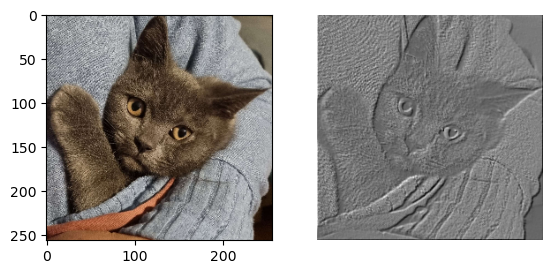

In [144]:
model = torch.nn.Conv2d(3, 1, 3, padding=1)
borders = torch.Tensor(
        [[
            [1, 0, -1],
            [1, 0, -1],
            [1, 0, -1]
        ]]
    )

embossing = torch.Tensor(
        [[
            [-2, -1, 0],
            [-1, 1, 1],
            [0, 1, 2]
        ]]
    )

sharpness = torch.Tensor(
        [[
            [0, -1, 0],
            [-1, 5, -1],
            [0, -1, 0]
        ]]
    )

gauss = torch.Tensor(
    [[
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1],
    ]]
)/16


model.weight = torch.nn.Parameter(torch.cat(3*[embossing]).unsqueeze(0))

img = PIL.Image.open('cat.png').convert('RGB')
img_tensor = torchvision.transforms.ToTensor()(img)
result = model(img_tensor.unsqueeze(0))
_, ax = plt.subplots(1, 2)
ax[0].imshow(img)
plt.axis('off')
ax[1].imshow(result.detach().numpy()[0, 0, :, :], cmap='gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

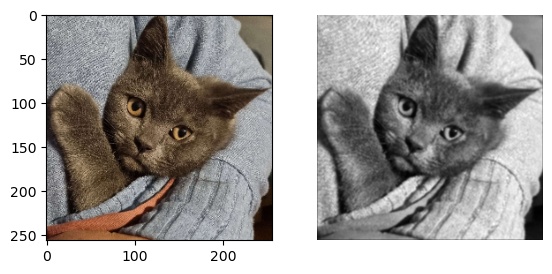

(-0.5, 255.5, 255.5, -0.5)

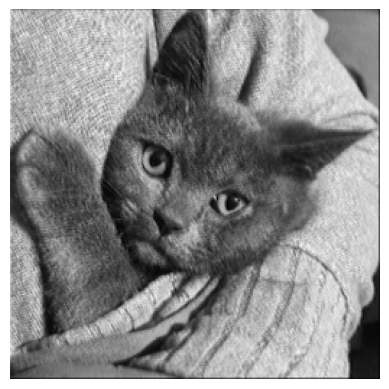